### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, LabelEncoder

### Загружаем датасет

In [2]:
data = pd.read_csv('dc-wikia-data.csv')

In [3]:
#первые 5 строк
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [4]:
#типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [5]:
#размер датасета
data.shape

(6896, 13)

### Масштабирование данных 

In [6]:
# Статистика датасета
data.describe()

,page_id,APPEARANCES,YEAR
count,6896.000000,6541.000000,6827.000000
mean,147441.209252,23.625134,1989.766662
std,108388.631149,87.378509,16.824194
min,1380.000000,1.000000,1935.000000
25%,44105.500000,2.000000,1983.000000
50%,141267.000000,6.000000,1992.000000
75%,213203.000000,15.000000,2003.000000
max,404010.000000,3093.000000,2013.000000


#### Выберем для масштабирования параметр "APPEARANCES"

In [7]:
data["APPEARANCES"]

0       3093.0
1       2496.0
2       1565.0
3       1316.0
4       1237.0
         ...  
6891       NaN
6892       NaN
6893       NaN
6894       NaN
6895       NaN
Name: APPEARANCES, Length: 6896, dtype: float64

###  Будем применять два подхода масштабирования: MinMax и на основе Z оценки

При MinMax масштабированиии значения после масштабирования всегда будут лежать в диапазоне от 0 до 1.

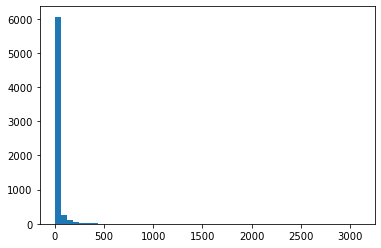

In [8]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])
plt.hist(data['APPEARANCES'], 50)
plt.show()

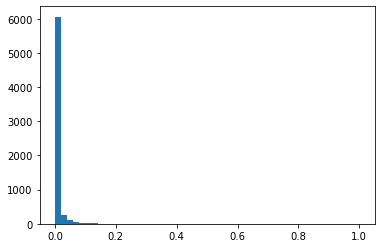

In [9]:
plt.hist(sc1_data, 50)
plt.show()

При масштабировании на основе Z оценки большинство значений попадает в диапазон от -3 до 3

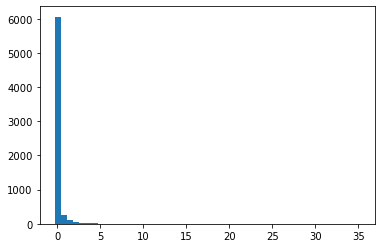

In [10]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['APPEARANCES']])
plt.hist(sc2_data, 50)
plt.show()

### Преобразование категориальных признаков в количественные

#### Label encoding 

Этот метод позваляет не расширять признаковое пространство набора данных.
Выберем для этого параметр "HAIR"

In [11]:
# обработка пропусков с заменой на "Unknown"
imp2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
data[['HAIR']] = imp2.fit_transform(data[['HAIR']])

#Уникальные типы
types = data['HAIR']
types.unique()

array(['Black Hair', 'Brown Hair', 'White Hair', 'Blond Hair', 'Red Hair',
       'Unknown', 'Green Hair', 'Strawberry Blond Hair', 'Grey Hair',
       'Silver Hair', 'Orange Hair', 'Purple Hair', 'Gold Hair',
       'Blue Hair', 'Reddish Brown Hair', 'Pink Hair', 'Violet Hair',
       'Platinum Blond Hair'], dtype=object)

In [12]:
#label encoding
le = LabelEncoder()
data_le = le.fit_transform(types)

In [13]:
# уникальные значения после label encoding
np.unique(data_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [14]:
# обратное преобразование
le.inverse_transform(data_le)

array(['Black Hair', 'Black Hair', 'Brown Hair', ..., 'Unknown',
       'Unknown', 'Blond Hair'], dtype=object)

#### One hot encoding

Этот метод не задает отношение порядка между значениями данного признака.

In [15]:
pd.get_dummies(data['HAIR']).head()

,Black Hair,Blond Hair,Blue Hair,Brown Hair,Gold Hair,Green Hair,Grey Hair,Orange Hair,Pink Hair,Platinum Blond Hair,Purple Hair,Red Hair,Reddish Brown Hair,Silver Hair,Strawberry Blond Hair,Unknown,Violet Hair,White Hair
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### График "Диаграмма рассеяния" 

<Figure size 864x432 with 0 Axes>

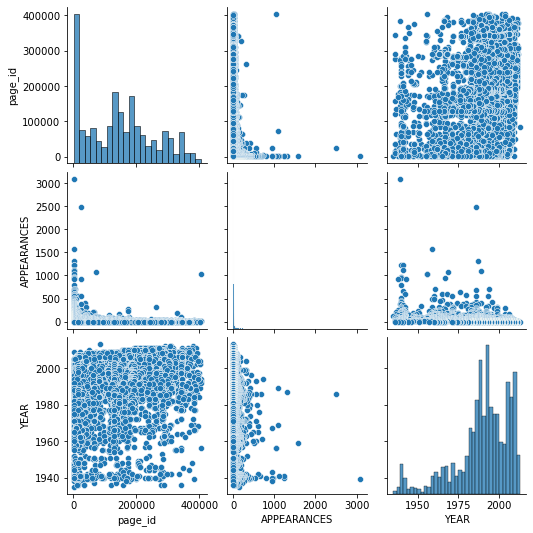

In [16]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(data)

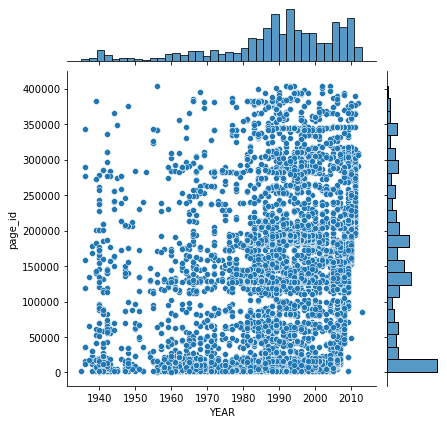

In [17]:
# Увеличенные диаграммы рассеяния для признаков, которые имеют зависимость
sns.jointplot(x = "YEAR", y = "page_id", kind="scatter", data = data)